In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address',], axis=1)
x.head()
colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]

In [3]:
class K_Means:
    def __init__(self, k=7, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):

            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [
                    np.linalg.norm(
                        featureset-self.centroids[centroid]
                    ) for centroid in self.centroids
                ]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0
                )
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [
            np.linalg.norm(
                data-self.centroids[centroid]
            ) for centroid in self.centroids
        ]

        classification = distances.index(min(distances))

        return classification

In [4]:
x2 = x[['Longitude', 'Latitude', 'SO2']].copy()
x2.head()

Longitude  Latitude       SO2
0  126.905597  37.55558  0.005071
1  126.905597  37.55558  0.005375
2  126.905597  37.55558  0.005222
3  126.905597  37.55558  0.005167
4  126.905597  37.55558  0.003905

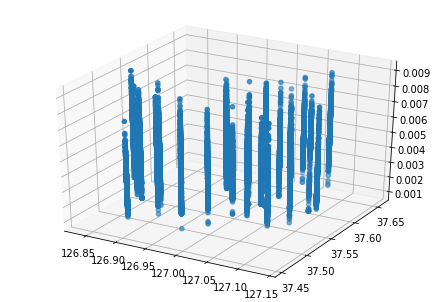

In [5]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x2['Longitude'], x2['Latitude'], x2['SO2'])
plt.show()

In [6]:
X_train, testSet = train_test_split(x2, test_size=0.2)

In [13]:
x_array = np.array(X_train)
x_array

array([[1.27068505e+02, 3.76587743e+01, 6.57142857e-03],
       [1.27011952e+02, 3.76479299e+01, 2.04166667e-03],
       [1.27004850e+02, 3.75400327e+01, 4.42857143e-03],
       ...,
       [1.26971481e+02, 3.74809167e+01, 4.47619048e-03],
       [1.26974676e+02, 3.75642629e+01, 6.63157895e-03],
       [1.27047470e+02, 3.75175282e+01, 4.70000000e-03]])

In [9]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.77361739, 1.        , 0.69642857],
       [0.586131  , 0.94746373, 0.13020833],
       [0.56258713, 0.42475005, 0.42857143],
       ...,
       [0.45196129, 0.13835946, 0.43452381],
       [0.46255335, 0.54213453, 0.70394737],
       [0.70388054, 0.31572581, 0.4625    ]])

In [8]:
clf = K_Means()
clf.fit(x_scaled)

In [11]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)

list_class = []
for centroid in clf.centroids:
    ax.scatter(
        clf.centroids[centroid][0], clf.centroids[centroid][1], clf.centroids[centroid][2],
        marker='o', color='k', s=150, linewidths=5
    )
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(
            featureset[0], featureset[1], featureset[2],
            marker='x', color=color, s=150, linewidths=1
        )
        list_class.append(classification)
plt.show()

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [10]:
X_train['Cluster'] = list_class
X_train.sample()

Longitude   Latitude       SO2  Cluster
16613  127.04747  37.517528  0.005696        1

In [9]:
test_array = np.array(testSet)

In [10]:
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(test_array)
test_scaled

array([[0.53125   , 0.56144068, 0.14      , 0.20833333, 0.04610379,
        0.04421478],
       [0.34375   , 0.23658192, 0.26882353, 0.22395833, 0.02404496,
        0.019038  ],
       [0.25      , 0.45762712, 0.07941176, 0.015625  , 0.00874746,
        0.0088585 ],
       ...,
       [0.3125    , 0.22669492, 0.37764706, 0.15625   , 0.04432894,
        0.04405937],
       [0.4702381 , 0.4511703 , 0.20840336, 0.32142857, 0.04196851,
        0.04173928],
       [0.375     , 0.38347458, 0.17764706, 0.19791667, 0.0300879 ,
        0.03947471]])

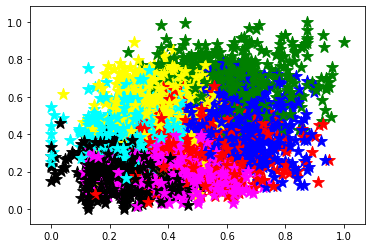

In [11]:
for clas in test_scaled:
    classification = clf.predict(clas)
    plt.scatter( clas[0], clas[1],color = colors[classification],marker='*', s=150, linewidths=1)
plt.show()